In [1]:
import numpy as np 
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('max_columns', None)

Get Data

In [2]:
byseason = pd.read_excel("/Users/shaneregel/Documents/Research/PenaltyVariance/Penalties.xlsx", sheet_name="BySeason")
totals = pd.read_excel("/Users/shaneregel/Documents/Research/PenaltyVariance/Penalties.xlsx", sheet_name="Totals")
totals

,HeadOfficial,OfficialID,GamesOfficiated,Seasons,TotalPenaltyCount,TotalPenaltyCount_CNT,TotalPenaltyYards,TotalPenaltyYards_CNT,TotalPenaltyCount_Rank,TotalPenaltyCount_PerGame,TotalPenaltyYards_PerGame,Declines_FieldName,Declines_CNT,Declines_PerGame,Declines_Rank,Major_FieldName,Major_CNT,Major_PerGame,Major_Rank,Minor_FieldName,Minor_CNT,Minor_PerGame,Minor_Rank,OffensiveHolding_FieldName,OffensiveHolding_CNT,OffensiveHolding_PerGame,OffensiveHolding_Rank,FalseStart_FieldName,FalseStart_CNT,FalseStart_PerGame,FalseStart_Rank,DefensiveHold_FieldName,DefensiveHold_CNT,DefensiveHold_PerGame,DefensiveHold_Rank,DefensivePI_FieldName,DefensivePI_CNT,DefensivePI_PerGame,DefensivePI_Rank,UnnecessaryRougness_FieldName,UnnecessaryRougness_CNT,UnnecessaryRougness_PerGame,UnnecessaryRougness_Rank,DefensiveOffside_FieldName,DefensiveOffside_CNT,DefensiveOffside_PerGame,DefensiveOffside_Rank,IllegalHands_FieldName,IllegalHands_CNT,IllegalHands_PerGame,IllegalHands_Rank,DelayofGame_FieldName,DelayofGame_CNT,DelayofGame_PerGame,DelayofGame_Rank,NeutralZoneInfraction_FieldName,NeutralZoneInfraction_CNT,NeutralZoneInfraction_PerGame,NeutralZoneInfraction_Rank,IllegalBlockAboveWaist_FieldName,IllegalBlockAboveWaist_CNT,IllegalBlockAboveWaist_PerGame,IllegalBlockAboveWaist_Rank,OffensivePI_FieldName,OffensivePI_CNT,OffensivePI_PerGame,OffensivePI_Rank,Facemask_FieldName,Facemask_CNT,Facemask_PerGame,Facemask_Rank,RoughingPasser_FieldName,RoughingPasser_CNT,RoughingPasser_PerGame,RoughingPasser_Rank,IllegalFormation_FieldName,IllegalFormation_CNT,IllegalFormation_PerGame,IllegalFormation_Rank,IllegalContact_FieldName,IllegalContact_CNT,IllegalContact_PerGame,IllegalContact_Rank,UnsportsmanlikeConduct_FieldName,UnsportsmanlikeConduct_CNT,UnsportsmanlikeConduct_PerGame,UnsportsmanlikeConduct_Rank,Encroachment_FieldName,Encroachment_CNT,Encroachment_PerGame,Encroachment_Rank,IntentionalGrounding_FieldName,IntentionalGrounding_CNT,IntentionalGrounding_PerGame,IntentionalGrounding_Rank,IneligibleDownfieldPass_FieldName,IneligibleDownfieldPass_CNT,IneligibleDownfieldPass_PerGame,IneligibleDownfieldPass_Rank,Defensive12Men_FieldName,Defensive12Men_CNT,Defensive12Men_PerGame,Defensive12Men_Rank,IllegalShift_FieldName,IllegalShift_CNT,IllegalShift_PerGame,IllegalShift_Rank,Taunting_FieldName,Taunting_CNT,Taunting_PerGame,Taunting_Rank
0,Walt Anderson,210,31,2018; 2019,565,565,4042,4042,16,18.225806,130.387097,Declined,68,2.193548,16,Major,365,11.774194,16,Minor,187,6.032258,16,Offensive Holding,121,3.903226,15,False Start,65,2.096774,17,Defensive Holding,47,1.516129,15,Defensive Pass Interference,46,1.483871,16,Unnecessary Roughness,18,0.580645,18,Defensive Offside,31,1.000000,16,Illegal Use of Hands,15,0.483871,14,Delay of Game,13,0.419355,16,Neutral Zone Infraction,26,0.838710,14,Illegal Block Above the Waist,21,0.677419,15,Offensive Pass Interference,20,0.645161,9,Face Mask (15 Yards),13,0.419355,12,Roughing the Passer,20,0.645161,15,Illegal Formation,14,0.451613,15,Illegal Contact,14,0.451613,6,Unsportsmanlike Conduct,3,0.096774,18,Encroachment,5,0.161290,14,Intentional Grounding,3,0.096774,18,Ineligible Downfield Pass,5,0.161290,18,Defensive Too Many Men on Field,5,0.161290,17,Illegal Shift,18,0.580645,2,Taunting,3,0.096774,13
1,Shawn Hochuli,687,59,2018; 2019; 2020; 2021,993,993,7180,7180,2,16.830508,121.694915,Declined,126,2.135593,3,Major,670,11.355932,1,Minor,310,5.254237,7,Offensive Holding,246,4.169492,1,False Start,129,2.186441,6,Defensive Holding,80,1.355932,3,Defensive Pass Interference,72,1.220339,8,Unnecessary Roughness,51,0.864407,2,Defensive Offside,54,0.915254,5,Illegal Use of Hands,25,0.423729,7,Delay of Game,23,0.389831,14,Neutral Zone Infraction,36,0.610169,4,Illegal Block Above the Waist,43,0.728814,1,Offensive Pass Interference,26,0.440678,5,Face Mask (15 Yards),22,0.372881,5,Roughing the Passer,37,0.627119,4,Illegal Formation,21,0.355932,8,Illegal Contact,12,0.203390,11,Unsportsmanlike Conduct,4,0.067797,15,Encroachment,13,0.22

In [3]:
pergame = totals[['HeadOfficial', 'OffensiveHolding_PerGame', 'FalseStart_PerGame', 'DefensiveHold_PerGame', 'DefensivePI_PerGame', 'UnnecessaryRougness_PerGame', 'DefensiveOffside_PerGame', 'IllegalHands_PerGame', 'DelayofGame_PerGame', 'NeutralZoneInfraction_PerGame', 'IllegalBlockAboveWaist_PerGame', 'OffensivePI_PerGame', 'Facemask_PerGame', 'RoughingPasser_PerGame', 'IllegalFormation_PerGame', 'IllegalContact_PerGame', 'UnsportsmanlikeConduct_PerGame', 'Encroachment_PerGame', 'IntentionalGrounding_PerGame', 'IneligibleDownfieldPass_PerGame', 'Defensive12Men_PerGame', 'IllegalShift_PerGame', 'Taunting_PerGame']]
pergame

,HeadOfficial,OffensiveHolding_PerGame,FalseStart_PerGame,DefensiveHold_PerGame,DefensivePI_PerGame,UnnecessaryRougness_PerGame,DefensiveOffside_PerGame,IllegalHands_PerGame,DelayofGame_PerGame,NeutralZoneInfraction_PerGame,IllegalBlockAboveWaist_PerGame,OffensivePI_PerGame,Facemask_PerGame,RoughingPasser_PerGame,IllegalFormation_PerGame,IllegalContact_PerGame,UnsportsmanlikeConduct_PerGame,Encroachment_PerGame,IntentionalGrounding_PerGame,IneligibleDownfieldPass_PerGame,Defensive12Men_PerGame,IllegalShift_PerGame,Taunting_PerGame
0,Walt Anderson,3.903226,2.096774,1.516129,1.483871,0.580645,1.000000,0.483871,0.419355,0.838710,0.677419,0.645161,0.419355,0.645161,0.451613,0.451613,0.096774,0.161290,0.096774,0.161290,0.161290,0.580645,0.096774
1,Shawn Hochuli,4.169492,2.186441,1.355932,1.220339,0.864407,0.915254,0.423729,0.389831,0.610169,0.728814,0.440678,0.372881,0.627119,0.355932,0.203390,0.067797,0.220339,0.118644,0.135593,0.135593,0.152542,0.186441
2,Bradley Rogers,3.600000,2.133333,1.133333,1.600000,0.600000,0.666667,0.200000,0.466667,1.000000,0.866667,0.533333,0.200000,0.733333,0.400000,0.200000,0.133333,0.200000,0.066667,0.266667,0.133333,0.400000,0.000000
3,Carl Cheffers,3.918033,2.032787,1.016393,1.327869,0.721311,0.983607,0.442623,0.491803,0.606557,0.672131,0.475410,0.278689,0.606557,0.426230,0.180328,0.163934,0.114754,0.229508,0.196721,0.163934,0.213115,0.114754
4,John Parry,4.000000,1.533333,1.066667,1.333333,1.000000,1.000000,0.266667,0.666667,0.466667,0.666667,0.333333,0.133333,0.733333,0.466667,0.333333,0.200000,0.066667,0.133333,0.000000,0.266667,0.333333,0.000000
5,Alex Kemp,3.081967,1.590164,1.262295,1.311475,0.672131,1.180328,0.344262,0.721311,0.573770,0.622951,0.590164,0.491803,0.704918,0.360656,0.278689,0.229508,0.147541,0.081967,0.131148,0.196721,0.147541,0.098361
6,Peter Morelli,3.533333,2.133333,1.066667,0.866667,1.066667,0.866667,0.333333,0.466667,0.400000,0.400000,0.733333,0.533333,0.600000,0.466667,0.133333,0.333333,0.066667,0.066667,0.266667,0.200000,0.400000,0.000000
7,Land Clark,2.733333,2.633333,0.733333,1.233333,0.700000,0.700000,0.500000,0.433333,0.433333,0.600000,0.500000,0.200000,1.066667,0.633333,0.166667,0.100000,0.033333,0.100000,0.466667,0.200000,0.133333,0.266667
8,Jerome Boger,2.885246,2.278689,1.360656,1.262295,0.819672,0.737705,0.442623,0.590164,0.672131,0.590164,0.327869,0.344262,0.491803,0.360656,0.229508,0.196721,0.213115,0.213115,0.163934,0.229508,0.163934,0.131148
9,Adrian Hill,3.255319,2.021277,1.127660,1.553191,0.723404,0.936170,0.340426,0.787234,0.468085,0.446809,0.340426,0.191489,0.574468,0.468085,0.191489,0.063830,0.106383,0.127660,0.276596,0.127660,0.148936,0.042553


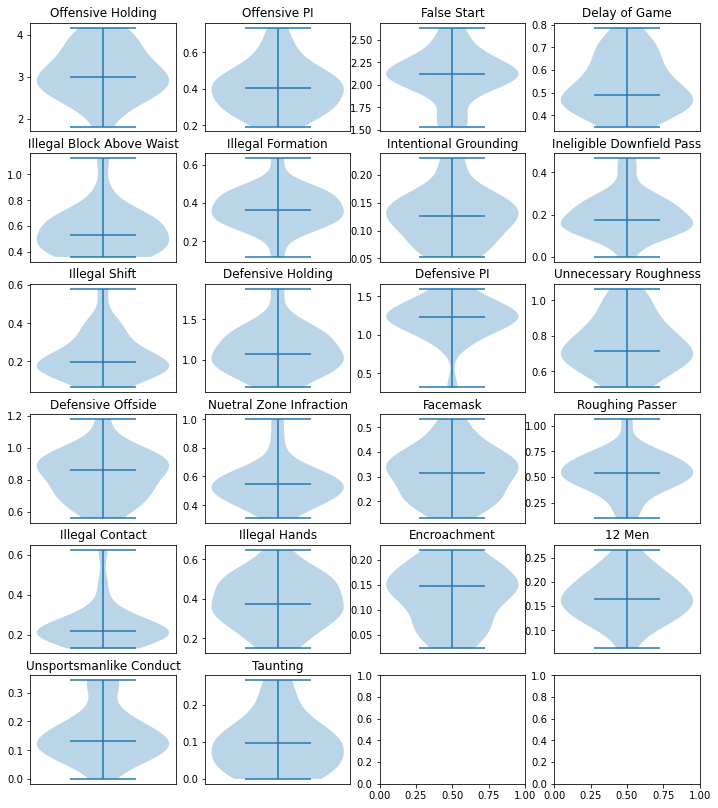

In [27]:
# Create figure with 4 axes
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(12, 14)) 

# Plot violin plot on axes
axs[0,0].violinplot(pergame.OffensiveHolding_PerGame, showmedians=True)
axs[0,0].set_title('Offensive Holding')
axs[0,0].set_xticks([0])

# Plot violin plot on axes
axs[0,1].violinplot(pergame.OffensivePI_PerGame, showmedians=True)
axs[0,1].set_title('Offensive PI')
axs[0,1].set_xticks([0])

axs[0,2].violinplot(pergame.FalseStart_PerGame, showmedians=True)
axs[0,2].set_title('False Start')
axs[0,2].set_xticks([0])

axs[0,3].violinplot(pergame.DelayofGame_PerGame, showmedians=True)
axs[0,3].set_title('Delay of Game')
axs[0,3].set_xticks([0])

axs[1,0].violinplot(pergame.IllegalBlockAboveWaist_PerGame, showmedians=True)
axs[1,0].set_title('Illegal Block Above Waist')
axs[1,0].set_xticks([0])

axs[1,1].violinplot(pergame.IllegalFormation_PerGame, showmedians=True)
axs[1,1].set_title('Illegal Formation')
axs[1,1].set_xticks([0])

axs[1,2].violinplot(pergame.IntentionalGrounding_PerGame, showmedians=True)
axs[1,2].set_title('Intentional Grounding')
axs[1,2].set_xticks([0])

axs[1,3].violinplot(pergame.IneligibleDownfieldPass_PerGame, showmedians=True)
axs[1,3].set_title('Ineligible Downfield Pass')
axs[1,3].set_xticks([0])

axs[2,0].violinplot(pergame.IllegalShift_PerGame, showmedians=True)
axs[2,0].set_title('Illegal Shift')
axs[2,0].set_xticks([0])

axs[2,1].violinplot(pergame.DefensiveHold_PerGame, showmedians=True)
axs[2,1].set_title('Defensive Holding')
axs[2,1].set_xticks([0])

axs[2,2].violinplot(pergame.DefensivePI_PerGame, showmedians=True)
axs[2,2].set_title('Defensive PI')
axs[2,2].set_xticks([0])

axs[2,3].violinplot(pergame.UnnecessaryRougness_PerGame, showmedians=True)
axs[2,3].set_title('Unnecessary Roughness')
axs[2,3].set_xticks([0])

axs[3,0].violinplot(pergame.DefensiveOffside_PerGame, showmedians=True)
axs[3,0].set_title('Defensive Offside')
axs[3,0].set_xticks([0])

axs[3,1].violinplot(pergame.NeutralZoneInfraction_PerGame, showmedians=True)
axs[3,1].set_title('Nuetral Zone Infraction')
axs[3,1].set_xticks([0])

axs[3,2].violinplot(pergame.Facemask_PerGame, showmedians=True)
axs[3,2].set_title('Facemask')
axs[3,2].set_xticks([0])

axs[3,3].violinplot(pergame.RoughingPasser_PerGame, showmedians=True)
axs[3,3].set_title('Roughing Passer')
axs[3,3].set_xticks([0])

axs[4,0].violinplot(pergame.IllegalContact_PerGame, showmedians=True)
axs[4,0].set_title('Illegal Contact')
axs[4,0].set_xticks([0])

axs[4,1].violinplot(pergame.IllegalHands_PerGame, showmedians=True)
axs[4,1].set_title('Illegal Hands')
axs[4,1].set_xticks([0])

axs[4,2].violinplot(pergame.Encroachment_PerGame, showmedians=True)
axs[4,2].set_title('Encroachment')
axs[4,2].set_xticks([0])

axs[4,3].violinplot(pergame.Defensive12Men_PerGame, showmedians=True)
axs[4,3].set_title('12 Men')
axs[4,3].set_xticks([0])

axs[5,0].violinplot(pergame.UnsportsmanlikeConduct_PerGame, showmedians=True)
axs[5,0].set_title('Unsportsmanlike Conduct')
axs[5,0].set_xticks([0])

axs[5,1].violinplot(pergame.Taunting_PerGame, showmedians=True)
axs[5,1].set_title('Taunting')
axs[5,1].set_xticks([0])

fig.savefig('graph.png')
plt.show()